<h5>a)</h5>
Se cargan los datos

In [1]:
import numpy as np
from keras.datasets import imdb
np.random.seed(3)
(X_train, y_train), (X_test, y_test) = imdb.load_data(seed=15)


Using TensorFlow backend.


<h5>b)</h5>
Se genera un boxplot donde se observa que se cumple la ley Zipf, ya que existen varios otulayers hacía arriba, los cuales corresponden al pequeño conjunto de palabras que son altamente utilizadas.

Review length: 


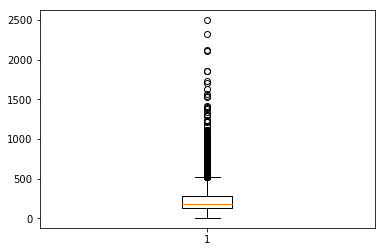

In [2]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
from matplotlib import pyplot
print("Review length: ")
result = list(map(len, X))
pyplot.boxplot(result)
pyplot.show()


Se genera un split de los datos creando un dataset solo con clase 0 y un dataset solo con clase 1, al obserbar el boxplot, los resultados son similares a los obtenidos anteriormente.

Review length with class 0: 


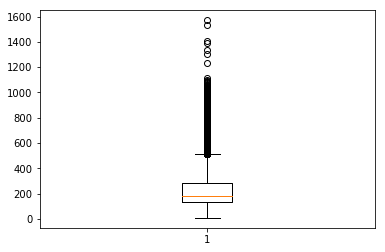

Review length with class 1: 


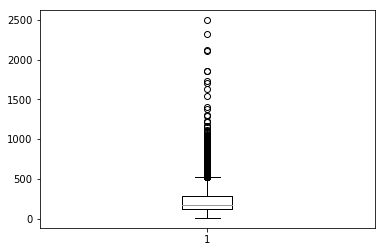

In [11]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
X_0, y_0, X_1, y_1 = [], [], [], []
for idx, val in enumerate(y):
    if int(val) == 0:
        X_0.append(X[idx])
        y_0.append(val)
    else:
        X_1.append(X[idx])
        y_1.append(val)

        
from matplotlib import pyplot
print("Review length with class 0: ")
result = list(map(len, X_0))
pyplot.boxplot(result)
pyplot.show()

print("Review length with class 1: ")
result = list(map(len, X_1))
pyplot.boxplot(result)
pyplot.show()

<h5>c)</h5>
Se cargan los datos extrayendo solo las 3000 palabras más relevantes. Además los comentarios con un largo menor se rellenan con ceros para que todos los vectores de datos sean de la misma forma.

In [3]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

from keras.preprocessing import sequence

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


<h5>d)</h5>

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 3000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 345s - loss: 0.5317 - acc: 0.7236 - val_loss: 0.3992 - val_acc: 0.8224
Epoch 2/3
25000/25000 [==============================] - 339s - loss: 0.3619 - acc: 0.8490 - val_loss: 0.3641 - val_acc: 0.8438
Epoch 3/3
25000/25000 [==============================] - 338s - loss: 0.3141 - acc: 0.8716 - val_loss: 0.3263 - val_acc: 0.8622


<h5>e)</h5>
Al cambiar la dimención de entrada del embedding a 2000 el algoritmo diverge

In [2]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 2000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 377s - loss: 3.8935 - acc: 0.2885 - val_loss: 7.9712 - val_acc: 0.0000e+00
Epoch 2/3
25000/25000 [==============================] - 376s - loss: 7.9712 - acc: 0.0000e+00 - val_loss: 7.9712 - val_acc: 0.0000e+00
Epoch 3/3
25000/25000 [==============================] - 364s - loss: 7.9712 - acc: 0.0000e+00 - val_loss: 7.9712 - val_acc: 0.0000e+00


Al aumentar la dimensión inicial del embedding a 4000, se obtiene un resultado con un valor de accuracy pequeñamente más alto

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 4000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 370s - loss: 0.5063 - acc: 0.7402 - val_loss: 0.5019 - val_acc: 0.7570
Epoch 2/3
25000/25000 [==============================] - 369s - loss: 0.3346 - acc: 0.8596 - val_loss: 0.3851 - val_acc: 0.8443
Epoch 3/3
25000/25000 [==============================] - 366s - loss: 0.2787 - acc: 0.8887 - val_loss: 0.3022 - val_acc: 0.8764


Al utilizar una dimensión inicial de 6000 el resultado es similar al caso anterior (con 4000) tanto en accuracy como en tiempos de entrenamiento.

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 6000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 353s - loss: 0.4939 - acc: 0.7466 - val_loss: 0.3110 - val_acc: 0.8666
Epoch 2/3
25000/25000 [==============================] - 349s - loss: 0.3184 - acc: 0.8692 - val_loss: 0.3125 - val_acc: 0.8682
Epoch 3/3
25000/25000 [==============================] - 373s - loss: 0.2741 - acc: 0.8904 - val_loss: 0.3023 - val_acc: 0.8754


Al disminuir el valor a 2500 los tiempos aumentan un poco, y la accuracy se mantiene casi igual.

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 2500
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 375s - loss: 0.5402 - acc: 0.7122 - val_loss: 0.4026 - val_acc: 0.8170
Epoch 2/3
25000/25000 [==============================] - 371s - loss: 0.3543 - acc: 0.8520 - val_loss: 0.3274 - val_acc: 0.8604
Epoch 3/3
25000/25000 [==============================] - 371s - loss: 0.3327 - acc: 0.8584 - val_loss: 0.3255 - val_acc: 0.8683


<h5>f</h5>

Se utilizan las 5000 palabras más frecuentes. el accuracy aumenta un poco, por lo cual disminuye el error de clasificación.

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=5000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 5000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 341s - loss: 0.4746 - acc: 0.7564 - val_loss: 0.3481 - val_acc: 0.8528
Epoch 2/3
25000/25000 [==============================] - 332s - loss: 0.2923 - acc: 0.8826 - val_loss: 0.3184 - val_acc: 0.8692
Epoch 3/3
25000/25000 [==============================] - 332s - loss: 0.2647 - acc: 0.8950 - val_loss: 0.3366 - val_acc: 0.8734


Al utilizar solo las 2000 palabras más significativas, los resultados son muy similares a los obtenidos en las 2 situaciones anteriores.

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=2000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
embedding_vector_length = 32
top_words = 2000
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 25000 samples, validate on 25000 samples
Epoch 1/3
25000/25000 [==============================] - 362s - loss: 0.5903 - acc: 0.6902 - val_loss: 0.5314 - val_acc: 0.7388
Epoch 2/3
25000/25000 [==============================] - 369s - loss: 0.3829 - acc: 0.8340 - val_loss: 0.3436 - val_acc: 0.8546
Epoch 3/3
25000/25000 [==============================] - 369s - loss: 0.3172 - acc: 0.8711 - val_loss: 0.3383 - val_acc: 0.8608


<h5>g)</h5>
Se utiliza dropout a continuación del embeding y de la capa LSTM. Los resultados obtenidos tienen el mayor accuracy de validación de todos los casos estudiados. Esto en teoría, debería ser gracias a que el utilizar dropout disminuye la posibilidad de overfitting, ajustandose mejor a los datos de prueba. 

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 3000
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)


Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           96000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 294s - loss: 0.4938 - acc: 0.7517   
Epoch 2/3
25000/25000 [==============================] - 289s - loss: 0.3433 - acc: 0.8574   
Epoch 3/3
25000/25000 [==============================] - 289s - loss: 0.2748 - acc: 0.8902   


<h5>h)</h5>
Se utilizan distintas técnicas para mejorar los resultados, entre ellas está la cross validation, el cambio de ciertos parámetros, etc. El mejor resultado obtenido para las pruebas realizadas, se logra al aumentar el largo del verctor del embedding a 128. En el caso contrario, el peor resultado fue al usar relu como función de activación en la última capa.


In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 3000
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='relu'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           96000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 149,301
Trainable params: 149,301
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 301s - loss: 1.1096 - acc: 0.5984   
Epoch 2/3
25000/25000 [==============================] - 307s - loss: 0.8880 - acc: 0.6617   
Epoch 3/3
25000/25000 [==============================] - 310s - loss: 0.5093 - acc: 0.7789   


In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 3000
embedding_vector_length = 50
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=0)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 50)           150000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               60400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 210,501
Trainable params: 210,501
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 309s - loss: 0.4467 - acc: 0.7880   
Epoch 2/3
25000/25000 [==============================] - 304s - loss: 0.3151 - acc: 0.8716   
Epoch 3/3
25000/25000 [==============================] - 299s - loss: 0.2929 - acc: 0.8814   


In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=3000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 3000
embedding_vector_length = 128
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=1)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          384000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 475,701
Trainable params: 475,701
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 310s - loss: 0.4640 - acc: 0.7770   
Epoch 2/3
25000/25000 [==============================] - 295s - loss: 0.3260 - acc: 0.8663   
Epoch 3/3
25000/25000 [==============================] - 142s   


In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=4000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)


from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 4500
embedding_vector_length = 128
model = Sequential()
model.add(Embedding(top_words, embedding_vector_length, input_length=500))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
scores = model.evaluate(X_test, y_test, verbose=1)

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          576000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 667,701
Trainable params: 667,701
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 315s - loss: 0.4908 - acc: 0.7632   
Epoch 2/3
25000/25000 [==============================] - 308s - loss: 0.3087 - acc: 0.8733   
Epoch 3/3
25000/25000 [==============================] - 135s   


In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=4000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 4500
embedding_vector_length = 128

from sklearn.cross_validation import KFold
kfold = KFold(7250, n_folds=5 , shuffle=True)
cvscores = []

for i, (train, test) in enumerate(kfold):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train, y_train, nb_epoch=3, batch_size=64)
    scores = model.evaluate(X_test, y_test, verbose=1)
    print("Acc: " + str(scores[1] * 100) + "%")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          576000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 667,701
Trainable params: 667,701
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
25000/25000 [==============================] - 312s - loss: 0.4203 - acc: 0.8037   
Epoch 2/3
25000/25000 [==============================] - 312s - loss: 0.2951 - acc: 0.8821   
Epoch 3/3
25000/25000 [==============================] - 138s   
Acc: 87.508%
acc: 87.51%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          576000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101    

In [1]:

import numpy as np
from keras.datasets import imdb
np.random.seed(3)
from keras.preprocessing import sequence
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=4000, seed=15)

X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
top_words = 4500
embedding_vector_length = 128

from sklearn.cross_validation import KFold
kfold = KFold(7250, n_folds=5 , shuffle=True)
cvscores = []

for i, (train, test) in enumerate(kfold):
    model = Sequential()
    model.add(Embedding(top_words, embedding_vector_length, input_length=500))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train[train], y_train[train], nb_epoch=3, batch_size=64)
    scores = model.evaluate(X_train[test], y_train[test], verbose=1)
    print("Acc: " + str(scores[1] * 100) + "%")
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

Using TensorFlow backend.
D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 128)          576000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 667,701
Trainable params: 667,701
Non-trainable params: 0
_________________________________________________________________
None


D:\Users\Felipe\Anaconda3\envs\tensorflow\lib\site-packages\keras\models.py:837: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/3
5800/5800 [==============================] - 75s - loss: 0.6170 - acc: 0.6434    
Epoch 2/3
5800/5800 [==============================] - 70s - loss: 0.3382 - acc: 0.8607    
Epoch 3/3
1450/1450 [==============================] - 8s     
Acc: 82.8275861905%
acc: 82.83%
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 128)          576000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101   